# Data Mining (KEN4113) #
## Lab 4: Clustering ##

Konstantin Sandfort
i6255681

In [38]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## Assignment 1

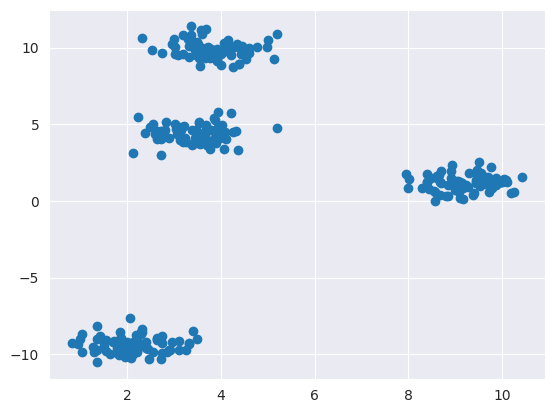

In [39]:
# (a) Data Generation

#centers = [[-3, -3], [3, -3], [-3, 3], [3, 3]]
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=None)
plt.scatter(X[:, 0], X[:, 1])

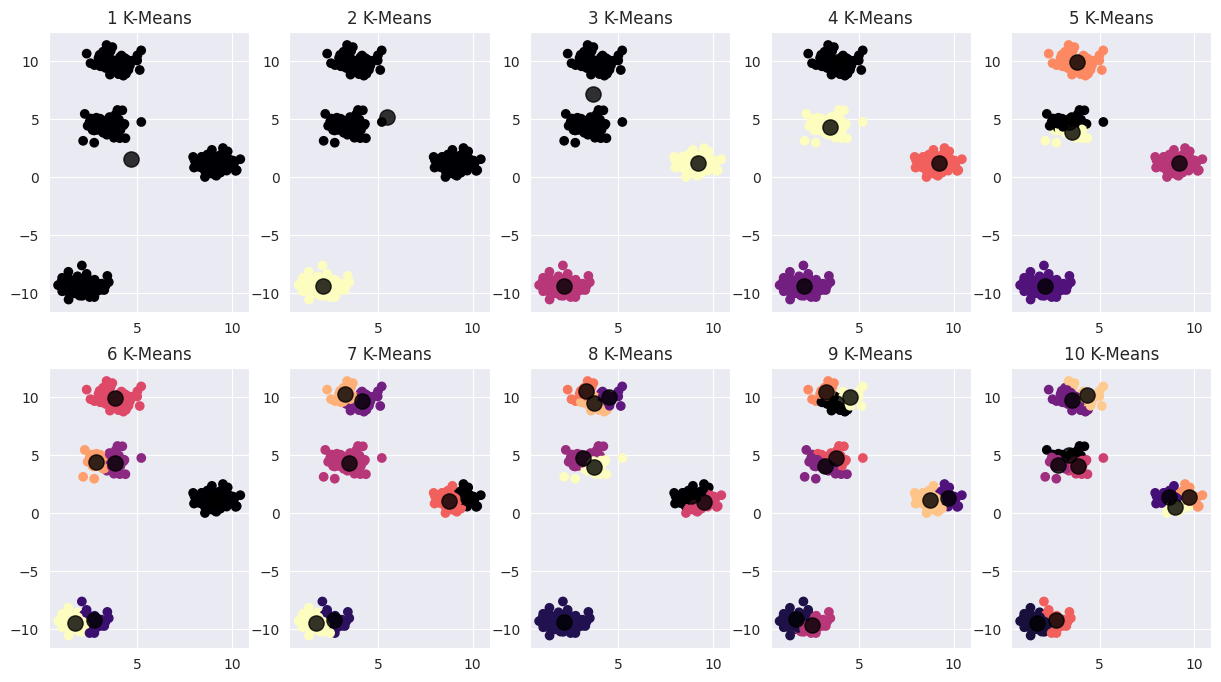

In [40]:
# (b) K-Means clustering
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
y_kmeans_list = []
scores = []

for i in range(10):
    # Define k
    k = i+1
    # Fit model
    clusters = KMeans(n_clusters=k, random_state=None, n_init="auto").fit(X)
    y_kmeans = clusters.predict(X)
    y_kmeans_list.append(y_kmeans)
    # Retrieve scores (SSE)
    scores.append(clusters.score(X))
    # Retrieve cluster centers
    cntr = clusters.cluster_centers_
    # Create subplots
    axs[int(i / 5), i % 5].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='magma')
    axs[int(i / 5), i % 5].scatter(cntr[:, 0], cntr[:, 1], c='black', s=120, alpha=0.8)
    axs[int(i / 5), i % 5].set_title(f'{k} K-Means')
plt.show()

In [41]:
# (b) K-Means Contingency Matrices

for i in range(10):
    print(f'Contingency Matrix for k = {i+1}')
    print(contingency_matrix(y, y_kmeans_list[i]))
    print('---')

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[75  0]
 [75  0]
 [75  0]
 [ 0 75]]
---
Contingency Matrix for k = 3
[[ 0  0 75]
 [75  0  0]
 [75  0  0]
 [ 0 75  0]]
---
Contingency Matrix for k = 4
[[ 0  0 75  0]
 [ 0  0  0 75]
 [75  0  0  0]
 [ 0 75  0  0]]
---
Contingency Matrix for k = 5
[[ 0  0 75  0  0]
 [37  0  0  0 38]
 [ 0  0  0 75  0]
 [ 0 75  0  0  0]]
---
Contingency Matrix for k = 6
[[75  0  0  0  0  0]
 [ 0  0 48  0 27  0]
 [ 0  0  0 75  0  0]
 [ 0 32  0  0  0 43]]
---
Contingency Matrix for k = 7
[[33  0  0  0 42  0  0]
 [ 0  0  0 75  0  0  0]
 [ 0  0 46  0  0 29  0]
 [ 0 31  0  0  0  0 44]]
---
Contingency Matrix for k = 8
[[35  0  0  0 40  0  0  0]
 [ 0  0  0 33  0  0  0 42]
 [ 0  0 21  0  0 22 32  0]
 [ 0 75  0  0  0  0  0  0]]
---
Contingency Matrix for k = 9
[[ 0  0 34  0  0  0  0 41  0]
 [ 0  0  0 42  0 33  0  0  0]
 [32  0  0  0  0  0 22  0 21]
 [ 0 39  0  0 36  0  0  0  0]]
---
Contingency Matrix for k = 10
[[ 0  0 25  0  0

Text(0, 0.5, 'SSE')

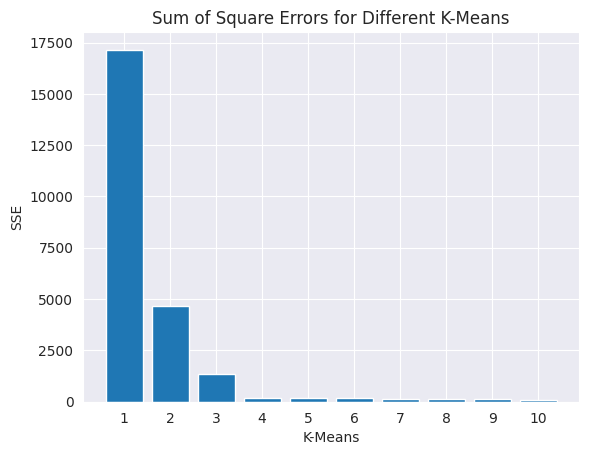

In [42]:
# (c) Sum of Square Errors

# Create x labels for barplot
x_labels = []
for i in range(10):
    x_labels.append(str(i + 1))

plt.bar(x_labels, np.abs(scores))
plt.title('Sum of Square Errors for Different K-Means')
plt.xlabel('K-Means')
plt.ylabel('SSE')


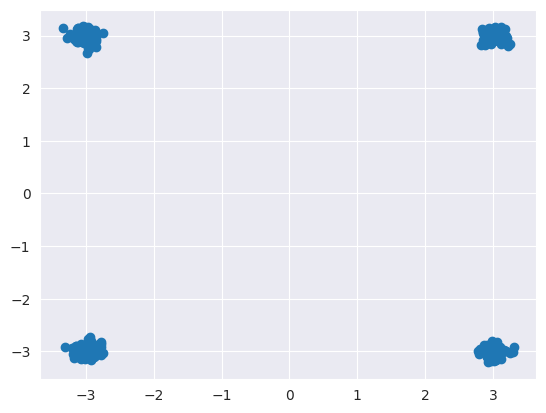

In [43]:
# (d) New Standard Deviation
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.1, random_state=None)
# Plot
plt.scatter(X[:, 0], X[:, 1])

[-5392.561897846643, -3593.4715944835757, -1348.4206033781734, -6.000127415638636, -5.4159544582454515, -5.029187733917675, -4.46048594757725, -3.746699840473762, -3.9326349365625277, -3.268986517991037]


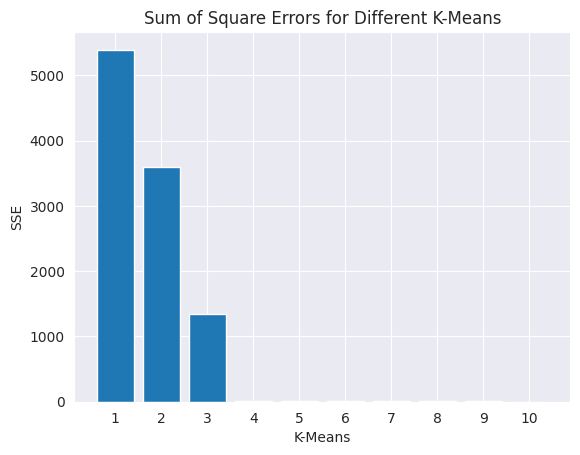

In [44]:
# (d) Calculate SSE for new blobs
scores = []
for i in range(10):
    # Define k
    k = i+1
    # Fit model
    clusters = KMeans(n_clusters=k, random_state=None, n_init="auto").fit(X)
    y_kmeans = clusters.predict(X)
    # Retrieve scores (SSE)
    scores.append(clusters.score(X))
    
plt.bar(x_labels, np.abs(scores))
plt.title('Sum of Square Errors for Different K-Means')
plt.xlabel('K-Means')
plt.ylabel('SSE')

# Print scores because values are no
print(scores)

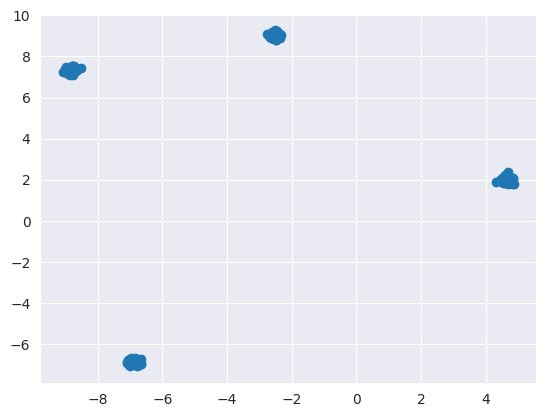

In [45]:
# (e)

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.1, random_state=42)
plt.scatter(X[:, 0], X[:, 1])

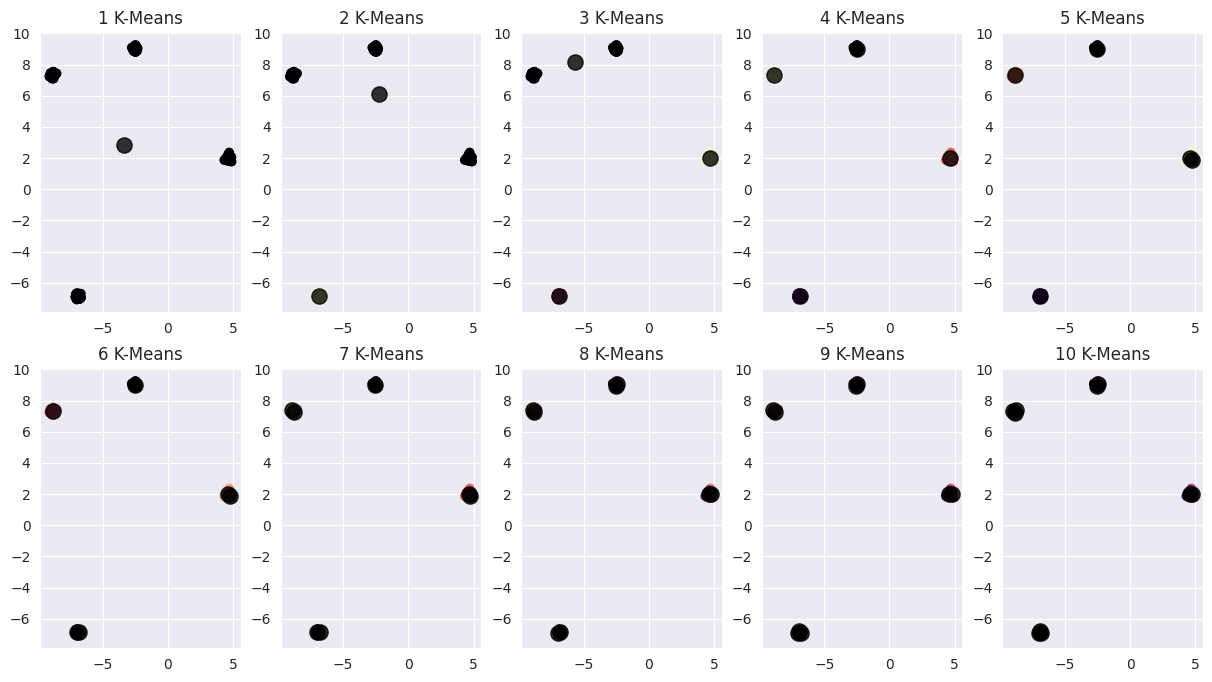

In [46]:
# (e) New k-Means clustering
# (b) K-Means clustering
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
y_kmeans_list = []
scores = []

for i in range(10):
    # Define k
    k = i+1
    # Fit model
    clusters = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)
    y_kmeans = clusters.predict(X)
    y_kmeans_list.append(y_kmeans)
    # Retrieve scores (SSE)
    scores.append(clusters.score(X))
    # Retrieve cluster centers
    cntr = clusters.cluster_centers_
    # Create subplots
    axs[int(i / 5), i % 5].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='magma')
    axs[int(i / 5), i % 5].scatter(cntr[:, 0], cntr[:, 1], c='black', s=120, alpha=0.8)
    axs[int(i / 5), i % 5].set_title(f'{k} K-Means')
plt.show()

## Assignment 2

In [77]:
# Load data
X = pd.read_csv('vertebrate.csv')
print(X.head(20))

# Remove non-numeric columns
y = X['Class']
X = X.drop(columns=['Name', 'Class'])
print(X.columns)

             Name  Warm-blooded  Gives Birth  Aquatic Creature  \
0           human             1            1                 0   
1          python             0            0                 0   
2          salmon             0            0                 1   
3           whale             1            1                 1   
4            frog             0            0                 1   
5          komodo             0            0                 0   
6             bat             1            1                 0   
7          pigeon             1            0                 0   
8             cat             1            1                 0   
9   leopard shark             0            1                 1   
10         turtle             0            0                 1   
11        penguin             1            0                 1   
12      porcupine             1            1                 0   
13            eel             0            0                 1   
14     sal

In [78]:
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
def hierarchical_clustering(link_type: str):
    Z = linkage(X, link_type)
    plt.figure(figsize=(10, 5))
    dn_ = dendrogram(Z)

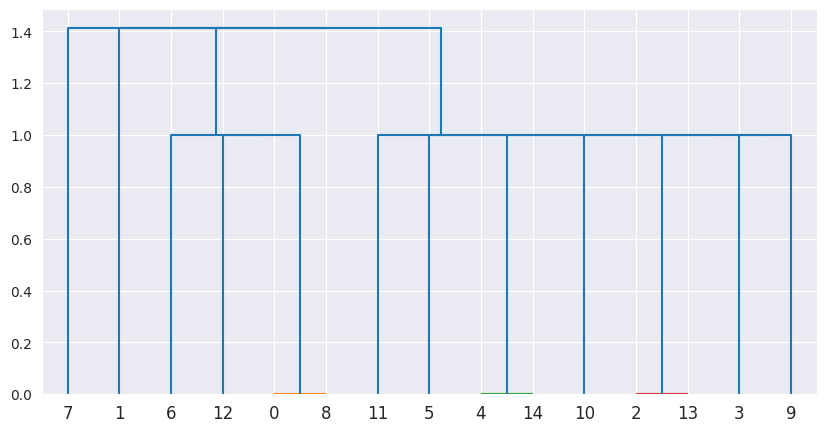

In [79]:
hierarchical_clustering('single')

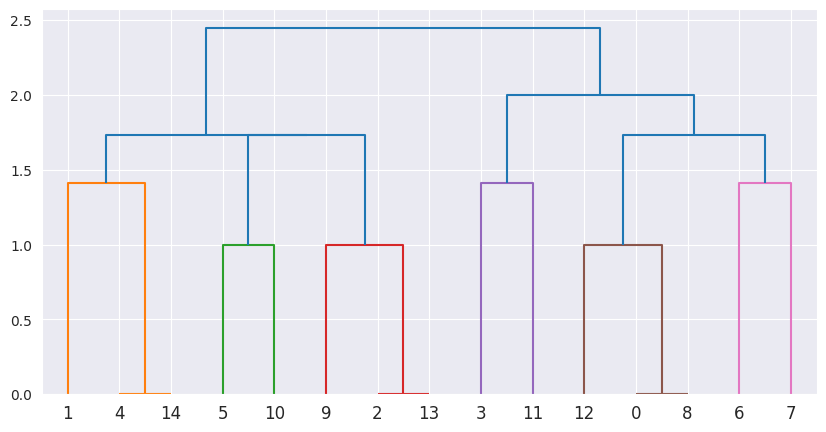

In [80]:
hierarchical_clustering('complete')

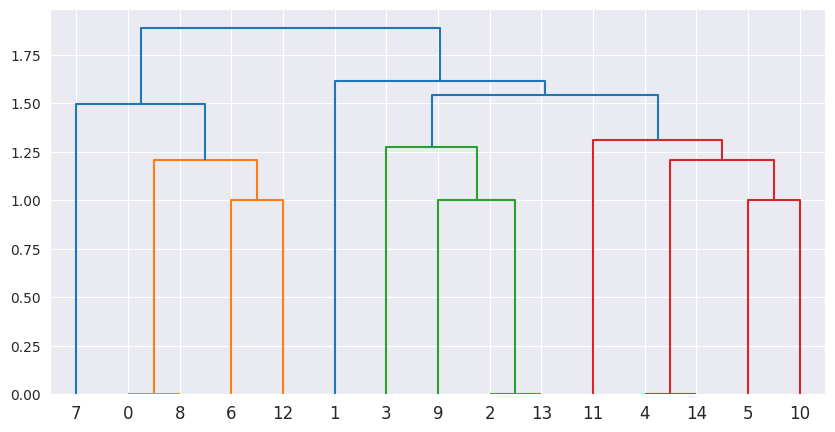

In [81]:
hierarchical_clustering('average')

## Assignment 3

In [83]:
# Load data
X = pd.read_csv('chameleon.csv')
print(X.head(10))

         x        y
0  650.914  214.888
1   41.767  179.408
2  509.126  233.749
3  486.403  152.427
4   46.883  367.904
5  539.270  343.616
6  614.930  139.613
7   61.127   99.230
8  334.174  380.344
9  284.575  412.521
